In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from keras.initializers import Constant
import numpy as np



In [32]:
data = pd.read_csv('/content/movie.csv')

In [33]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [34]:
data['label'].value_counts(normalize=True)

0    0.500475
1    0.499525
Name: label, dtype: float64

In [35]:
nltk.download('stopwords')
# We filter out the english language stopwrds

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
remove_chars = "@S+|https?:S+|http?:S|[^A-Za-z0-9]+"

In [37]:
def tokenize_text(text):
  # Text passed to the regex equatio
  text = re.sub(remove_chars, ' ', str(text).lower()).strip()
  # Empty list created to store final tokens
  tokens = []
  for token in text.split():
    # check if the token is a stop word or not
    if token not in stop_words:
        tokens.append(token)
  return " ".join(tokens)

In [38]:
data['tokenized_text'] = data['text'].apply(lambda x: tokenize_text(x))

In [39]:
data.head()

,text,label,tokenized_text
0,I grew up (b. 1965) watching and loving the Th...,0,grew b 1965 watching loving thunderbirds mates...
1,"When I put this movie in my DVD player, and sa...",0,put movie dvd player sat coke chips expectatio...
2,Why do people who do not know what a particula...,0,people know particular time past like feel nee...
3,Even though I have great interest in Biblical ...,0,even though great interest biblical movies bor...
4,Im a die hard Dads Army fan and nothing will e...,1,im die hard dads army fan nothing ever change ...


In [40]:
train,test = train_test_split(data, test_size=0.25, random_state=42)

In [41]:
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

In [42]:
test.head()

,text,label,tokenized_text
0,The central theme in this movie seems to be co...,0,central theme movie seems confusion relationsh...
1,"An excellent example of ""cowboy noir"", as it's...",1,excellent example cowboy noir called unemploye...
2,The ending made my heart jump up into my throa...,0,ending made heart jump throat proceeded leave ...
3,Only the chosen ones will appreciate the quali...,1,chosen ones appreciate quality story character...
4,"This is a really funny film, especially the se...",1,really funny film especially second third four...


In [43]:
train.shape, test.shape

((30000, 3), (10000, 3))

In [44]:
from keras.layers import TextVectorization

vectorizer = TextVectorization(max_tokens=10000, output_sequence_length=100)
vectorizer.adapt(train['tokenized_text'])
voc = vectorizer.get_vocabulary()

In [45]:
x_train = vectorizer(np.array([[s] for s in train['tokenized_text']])).numpy()
x_test  = vectorizer(np.array([[s] for s in test['tokenized_text']])).numpy()

# y_train = np.array(train['label'])
# y_test = np.array(test['label'])

In [46]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(train['label'].tolist()).reshape(-1,1))
y_train = enc.transform(np.array(train['label'].tolist()).reshape(-1,1)).toarray()
y_test = enc.transform(np.array(test['label'].tolist()).reshape(-1,1)).toarray()

In [47]:
x_train

array([[4933, 1120,  950, ...,    0,    0,    0],
       [ 241,  216, 8904, ...,    0,    0,    0],
       [  14,  457,  178, ...,  216,   26,    6],
       ...,
       [2390,  362,   13, ...,   23,    1, 4093],
       [ 420, 7989,    5, ...,  487, 3603, 1313],
       [   3,  365, 1294, ...,    0,    0,    0]])

In [48]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((30000, 100), (30000, 2), (10000, 100), (10000, 2))

In [22]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2024-03-13 15:59:32--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-03-13 15:59:32--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-03-13 15:59:33--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [49]:
path_to_glove_file = "glove.6B.50d.txt"

embeddings_dict_50 = {}

with open(path_to_glove_file) as f:
  for line in f:
    word, coefs = line.split(maxsplit=1)
    coefs = np.fromstring(coefs, 'f', sep=' ')
    embeddings_dict_50[word] = coefs

print("Found {} word vectors. Vector length is {}.".format(len(embeddings_dict_50), len(list(embeddings_dict_50.values())[0])))

Found 400000 word vectors. Vector length is 50.


In [50]:
path_to_glove_file = "glove.6B.100d.txt"

embeddings_dict_100 = {}

with open(path_to_glove_file) as f:
  for line in f:
    word, coefs = line.split(maxsplit=1)
    coefs = np.fromstring(coefs, 'f', sep=' ')
    embeddings_dict_100[word] = coefs

print("Found {} word vectors. Vector length is {}.".format(len(embeddings_dict_100), len(list(embeddings_dict_100.values())[0])))

Found 400000 word vectors. Vector length is 100.


In [51]:
hits = 0

embedding_matrix_50 = np.zeros((len(voc), 50))
for ind, word in enumerate(voc):
  if word in embeddings_dict_50.keys():
    embedding_matrix_50[ind] = embeddings_dict_50[word].copy()
    hits += 1

print('converted {} words output {} ({} misses)'.format(hits, len(voc), len(voc)-hits))

converted 9995 words output 10000 (5 misses)


In [52]:
hits = 0

embedding_matrix_100 = np.zeros((len(voc), 100))
for ind, word in enumerate(voc):
  if word in embeddings_dict_100.keys():
    embedding_matrix_100[ind] = embeddings_dict_100[word].copy()
    hits += 1

print('converted {} words output {} ({} misses)'.format(hits, len(voc), len(voc)-hits))

converted 9995 words output 10000 (5 misses)


In [53]:
def gru_model(input_dim,output_dim,num_classes,embedding_matrix):
  model = Sequential()
  model.add(Embedding(input_dim = input_dim , output_dim = output_dim,embeddings_initializer=Constant(embedding_matrix), trainable=False))
  model.add(GRU(32))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [54]:
gru_50 = gru_model(len(voc),50,2,embedding_matrix_50)
gru_50.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 50)          500000    
                                                                 
 gru_1 (GRU)                 (None, 32)                8064      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 509186 (1.94 MB)
Trainable params: 9186 (35.88 KB)
Non-trainable params: 500000 (1.91 MB)
_________________________________________________________________


In [55]:
gru_fitted_50 = gru_50.fit(x_train, y_train, epochs=10, validation_split=0.2,batch_size=256)

Epoch 1/10
94/94 [==============================] - 16s 129ms/step - loss: 0.6892 - accuracy: 0.5286 - val_loss: 0.6809 - val_accuracy: 0.5440
Epoch 2/10
94/94 [==============================] - 9s 91ms/step - loss: 0.6039 - accuracy: 0.6689 - val_loss: 0.5231 - val_accuracy: 0.7473
Epoch 3/10
94/94 [==============================] - 14s 149ms/step - loss: 0.4882 - accuracy: 0.7727 - val_loss: 0.4972 - val_accuracy: 0.7673
Epoch 4/10
94/94 [==============================] - 9s 94ms/step - loss: 0.4466 - accuracy: 0.7953 - val_loss: 0.4421 - val_accuracy: 0.7953
Epoch 5/10
94/94 [==============================] - 11s 112ms/step - loss: 0.4227 - accuracy: 0.8073 - val_loss: 0.4322 - val_accuracy: 0.7968
Epoch 6/10
94/94 [==============================] - 12s 131ms/step - loss: 0.4052 - accuracy: 0.8160 - val_loss: 0.4197 - val_accuracy: 0.8067
Epoch 7/10
94/94 [==============================] - 7s 74ms/step - loss: 0.3951 - accuracy: 0.8215 - val_loss: 0.4104 - val_accuracy: 0.8152
Epoch

In [56]:
gru_100 = gru_model(len(voc),100,2,embedding_matrix_100)
gru_100.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         1000000   
                                                                 
 gru_2 (GRU)                 (None, 32)                12864     
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1013986 (3.87 MB)
Trainable params: 13986 (54.63 KB)
Non-trainable params: 1000000 (3.81 MB)
_________________________________________________________________


In [57]:
gru_fitted_100 = gru_100.fit(x_train, y_train, epochs=10, validation_split=0.2,batch_size=256)

Epoch 1/10
94/94 [==============================] - 19s 171ms/step - loss: 0.6888 - accuracy: 0.5243 - val_loss: 0.6775 - val_accuracy: 0.5512
Epoch 2/10
94/94 [==============================] - 15s 164ms/step - loss: 0.5820 - accuracy: 0.6926 - val_loss: 0.4955 - val_accuracy: 0.7708
Epoch 3/10
94/94 [==============================] - 13s 143ms/step - loss: 0.4468 - accuracy: 0.7995 - val_loss: 0.4370 - val_accuracy: 0.8010
Epoch 4/10
94/94 [==============================] - 13s 136ms/step - loss: 0.3980 - accuracy: 0.8231 - val_loss: 0.3965 - val_accuracy: 0.8237
Epoch 5/10
94/94 [==============================] - 18s 189ms/step - loss: 0.3663 - accuracy: 0.8382 - val_loss: 0.3835 - val_accuracy: 0.8280
Epoch 6/10
94/94 [==============================] - 19s 204ms/step - loss: 0.3509 - accuracy: 0.8479 - val_loss: 0.3946 - val_accuracy: 0.8257
Epoch 7/10
94/94 [==============================] - 13s 141ms/step - loss: 0.3374 - accuracy: 0.8534 - val_loss: 0.3633 - val_accuracy: 0.8398

In [58]:
def performance(model, x, y):
  loss,accuracy = model.evaluate(x,y)
  print(loss)
  print(accuracy)

  y_pred = model.predict(x)
  predicted_classes = np.argmax(y_pred, axis=1)
  true_classes = np.argmax(y, axis=1)

  conf_matrix = confusion_matrix(true_classes, predicted_classes)
  plt.figure()
  sns.heatmap(conf_matrix.T, square=True, annot=True, fmt='d', cbar=False)
  plt.xlabel("True Label")
  plt.ylabel("Predicted Label")

Confusion matrix of GRU 50 model:
313/313 [==============================] - 5s 16ms/step - loss: 0.3948 - accuracy: 0.8230
0.3948245942592621
0.8230000138282776
313/313 [==============================] - 6s 16ms/step


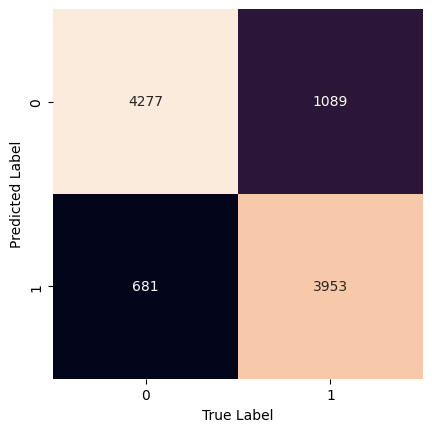

In [59]:
print('Confusion matrix of GRU 50 model:')
performance(gru_50,x_test,y_test)

Confusion matrix of GRU 100 model:
313/313 [==============================] - 4s 12ms/step - loss: 0.3433 - accuracy: 0.8505
0.3433462977409363
0.8504999876022339
313/313 [==============================] - 4s 10ms/step


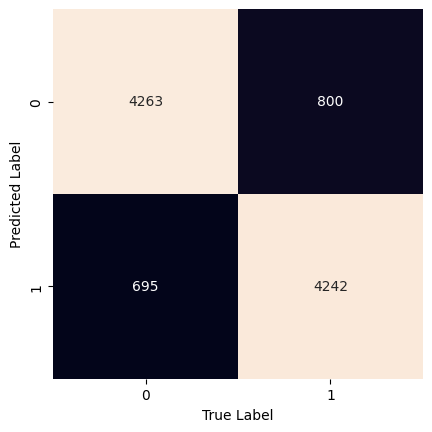

In [60]:
print('Confusion matrix of GRU 100 model:')
performance(gru_100,x_test,y_test)

In [61]:
test['no_of_tokens'] = test['tokenized_text'].apply(lambda x : len(x.split(' ',-1)))

In [62]:
test.head()

,text,label,tokenized_text,no_of_tokens
0,The central theme in this movie seems to be co...,0,central theme movie seems confusion relationsh...,148
1,"An excellent example of ""cowboy noir"", as it's...",1,excellent example cowboy noir called unemploye...,241
2,The ending made my heart jump up into my throa...,0,ending made heart jump throat proceeded leave ...,29
3,Only the chosen ones will appreciate the quali...,1,chosen ones appreciate quality story character...,67
4,"This is a really funny film, especially the se...",1,really funny film especially second third four...,63


In [63]:
sorted_test = test.sort_values('no_of_tokens')
n = len(test)
short_indices = sorted_test.index[0:int(0.33*n)]
short_x_test = x_test[short_indices]
short_y_test = y_test[short_indices]

medium_indices = sorted_test.index[int(0.33*n):int(0.67*n)]
medium_x_test = x_test[medium_indices]
medium_y_test = y_test[medium_indices]

long_indices = sorted_test.index[int(0.67*n):n]
long_x_test = x_test[long_indices]
long_y_test = y_test[long_indices]

Confusion matrix on short data
104/104 [==============================] - 2s 18ms/step - loss: 0.3445 - accuracy: 0.8567
0.3444814085960388
0.8566666841506958
104/104 [==============================] - 3s 28ms/step
Confusion matrix on medium data
107/107 [==============================] - 2s 19ms/step - loss: 0.3592 - accuracy: 0.8468
0.3591828942298889
0.8467646837234497
107/107 [==============================] - 1s 9ms/step
Confusion matrix on long data
104/104 [==============================] - 1s 10ms/step - loss: 0.4819 - accuracy: 0.7648
0.4818896949291229
0.7648484706878662
104/104 [==============================] - 1s 9ms/step


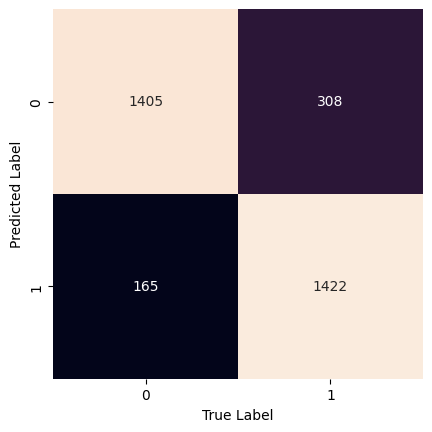

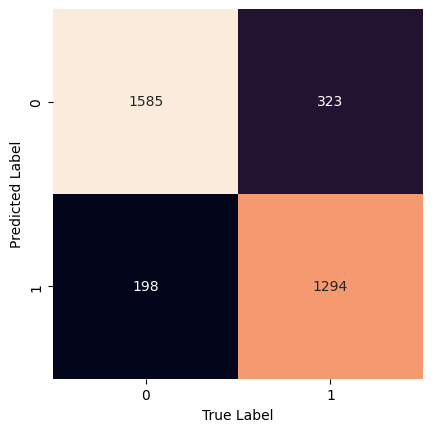

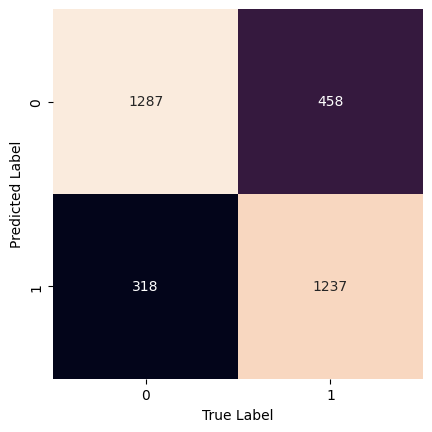

In [64]:
for data in ('short','medium','long'):
  print(f'Confusion matrix on {data} data')
  if data == 'short':
    x = short_x_test
    y = short_y_test
  elif data == 'medium':
    x = medium_x_test
    y = medium_y_test
  else:
    x = long_x_test
    y = long_y_test
  performance(gru_50, x,y)

Confusion matrix on short data
104/104 [==============================] - 1s 11ms/step - loss: 0.2773 - accuracy: 0.8848
0.27731049060821533
0.8848484754562378
104/104 [==============================] - 1s 10ms/step
Confusion matrix on medium data
107/107 [==============================] - 2s 14ms/step - loss: 0.3188 - accuracy: 0.8653
0.31879889965057373
0.8652940988540649
107/107 [==============================] - 2s 17ms/step
Confusion matrix on long data
104/104 [==============================] - 2s 17ms/step - loss: 0.4347 - accuracy: 0.8009
0.4346729516983032
0.8009091019630432
104/104 [==============================] - 2s 18ms/step


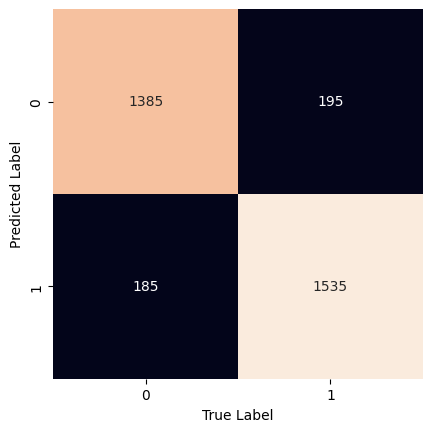

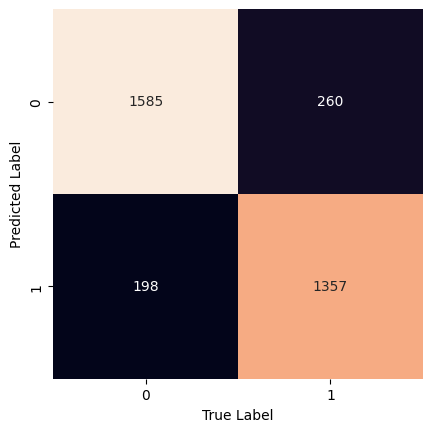

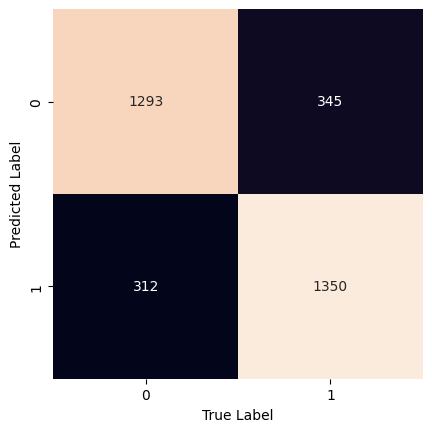

In [65]:
for data in ('short','medium','long'):
  print(f'Confusion matrix on {data} data')
  if data == 'short':
    x = short_x_test
    y = short_y_test
  elif data == 'medium':
    x = medium_x_test
    y = medium_y_test
  else:
    x = long_x_test
    y = long_y_test
  performance(gru_100, x,y)